In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib inline

#universal constants in SI units

c = 2.99792458e10
G = 6.67430e-8
sigma = 5.670374419e-5
h = 6.6260755e-27
k_B = 1.380658e-16
solarmass = 1.99e33
m_p = 1.6726231e-24
m_H = m_p


#M_dot mass accretion
M_dot_crit = 1.5e17 #m g s^-1

#schwarzschild radius #chris says its actually just G*M/(c**2)
def r_g(M):
    return 2*G*M/(c**2) # <- r_s

#r_g is just r_s/2
    
#variable constants in SI

#bhmass = 10*solarmass
#Rg = (bhmass*G)/(c**2)
#Rin = 6*Rg
#Rout = Rg*10**5
#masschange = 10**15


#KATO UNITS
# g, cm, K

In [32]:
#Opacity values

#kappa_es = .4 cm^2g^-1
#kappa_ff = kappa_0*rho*T^-3.5
#kappa_0 = 6.4x10^22
#optical_depth = tau_* = sqrt(kappa_es*kappa_ff)*rho*H

#radiation constant 'a' in textbooks
a_rad = 4*sigma/c

kappa_es = 0.4
kappa_0 = 6.4e22

def kappa_ff(rho, T_c):
    a = kappa_0*rho*T_c**-3.5
    return a

def kappa(rho, T_c):
    a = kappa_es + kappa_0*rho*T_c**-3.5
    return a

def kappa_bf(rho, T_c):
    return  kappa_es + 5e24*rho*T_c**-3.5
#pressure equations

def p_gas(rho, T_c):
    a = 2*k_B*rho*T_c/m_H
    return a

def p_rad(a, T_c):
    b = a*(T_c^4)/3
    return b

def p(a, rho, T_c):
    c = p_gas(rho, T_c) + p_rad(a, T_c)
    return c


In [8]:
#test values
M = solarmass
M_dot = 5e16

In [9]:
def r_hat(r, M):
    return r/r_g(M)
     
def m(M):
    return M/solarmass

def m_dot(M_dot):
    return M_dot/M_dot_crit
    
#def f(r, M):
#    a = np.sqrt(3*r_g(M)/r)
#    b = 1-a
#    return b

def f(r, M):
    a = np.sqrt(5e8/r)
    b = 1-a
    return b

alpha = 0.4 #s-s dimensionless value
nu = 0.1 #efficiency
m_dot16 = (4*np.pi*G*m(M)*m_p/(c*nu*sigma))/1e16 #eddington limit of accretion mass/(10**16 g/s)

In [10]:
#INNER REGION

#disk height
def H_inner(r, M, M_dot):
    return 5.5e4*m(M)*m_dot(M_dot)*f(r,M)
#surface density
def SIGMA_inner(r, M, M_dot):
    return (1e2)*(alpha**(-1))*(m_dot(M_dot)**(-1))*(r_hat(r,M)**(3/2))*(f(r, M)**(-1))
#density
def rho_inner(r, M, M_dot):
    return (9e-4)*(alpha**-1)*(m(M)**-1)*(m_dot(M_dot)**-2)*(r_hat(r,M)**(3/2))*(f(r, M)**-2)
#radial drift velocity
def u_r_inner(r, M, M_dot):
    return (7.6e8)*(alpha)*(m_dot(M_dot)**2)*(r_hat(r,M)**(-5/2))*(f(r, M))
#central temp
def T_c_inner(r, M, M_dot):
    return (4.9e7)*(alpha**(-1/4))*(m(M)**(-1/4))*(r_hat(r,M)**(-3/8))
#effective optical depth
def tau_inner(r, M, M_dot):
    return (8.4e-3)*(alpha**(-17/16))*(m(M)**(-1/16))*(m_dot(M_dot)**-2)*(r_hat(r,M)**(93/32))*(f(r, M)**-2)

#MIDDLE REGION

#disk height
def H_middle(r, M, M_dot):
    return (2.7e3)*(alpha**(-1/10))*(m(M)**(9/10))*(m_dot(M_dot)**(1/5))*(r_hat(r,M)**(21/20))*(f(r, M)**(1/5))
#surface density
def SIGMA_middle(r, M, M_dot):
    return (4.3e4)*(alpha**(-4/5))*(m(M)**(1/5))*(m_dot(M_dot)**(3/5))*(r_hat(r,M)**(-3/5))*(f(r, M)**(3/5))
#density
def rho_middle(r, M, M_dot):
    return (8)*(alpha**(-7/10))*(m(M)**(-7/10))*(m_dot(M_dot)**(2/5))*(r_hat(r,M)**(-33/20))*(f(r, M)**(2/5))
#radial drift velocity
def u_r_middle(r, M, M_dot):
    return (1.7e6)*(alpha**(4/5))*(m(M)**(-1/5))*(m_dot(M_dot)**(2/5))*(r_hat(r,M)**(-2/5))*(f(r, M)**(-3/5))
#central temp
def T_c_middle(r, M, M_dot):
    return (2.2e8)*(alpha**(-1/5))*(m(M)**(-1/5))*(m_dot(M_dot)**(2/5))*(r_hat(r,M)**(-9/10))*(f(r, M)**(2/5))
#effective optical depth
def tau_middle(r, M, M_dot):
    return (2.4e1)*(alpha**(-4/5))*(m(M)**(1/5))*(m_dot(M_dot)**(1/10))*(r_hat(r,M)**(3/20))*(f(r, M)**(1/10))

#OUTER REGION

#disk height
def H_outer(r, M, M_dot):
    return (1.5e3)*(alpha**(-1/10))*(m(M)**(9/10))*(m_dot(M_dot)**(3/20))*(r_hat(r,M)**(9/8))*(f(r, M)**(3/20))
#surface density
def SIGMA_outer(r, M, M_dot):
    return (1.4e5)*(alpha**(-4/5))*(m(M)**(1/5))*(m_dot(M_dot)**(7/10))*(r_hat(r,M)**(-3/4))*(f(r, M)**(7/10))
#density
def rho_outer(r, M, M_dot):
    return (4.7e1)*(alpha**(-7/10))*(m(M)**(-7/10))*(m_dot(M_dot)**(11/20))*(r_hat(r,M)**(-15/8))*(f(r, M)**(11/20))
#radial drift velocity
def u_r_outer(r, M, M_dot):
    return (5.4e5)*(alpha**(4/5))*(m(M)**(-1/5))*(m_dot(M_dot)**(3/10))*(r_hat(r,M)**(-1/4))*(f(r, M)**(-7/10))
#central temp
def T_c_outer(r, M, M_dot):
    return (6.9e7)*(alpha**(-1/5))*(m(M)**(-1/5))*(m_dot(M_dot)**(3/10))*(r_hat(r,M)**(-3/4))*(f(r, M)**(3/10))
#effective optical depth
def tau_outer(r, M, M_dot):
    return (7.9e1)*(alpha**(-4/5))*(m(M)**(1/5))*(m_dot(M_dot)**(1/5))*(f(r, M)**(1/5))

In [11]:
r_hat(1e7,M)

33.833942751259016

In [12]:
r_hat(1e9,M)

3383.3942751259015

In [13]:
150*((alpha*m(M))**(2/21))*(m_dot(M_dot)**16/21)

1.520662514430104e-07

In [14]:
(6.3e3)*(m_dot(M_dot)**(2/3))

3028.724097645558

In [15]:
def Variable_plot(rmin, rmax, M, M_dot, NPanels, variable):
    
    rlogarray = np.linspace(np.log10(rmin),np.log10(rmax),NPanels+1)
    rarray = 10**rlogarray
    
    rlogmidpoints = rlogarray + (rlogarray[1]-rlogarray[0])/2
    rlogmidpoints = np.delete(rlogmidpoints,len(rlogmidpoints)-1)  
    rmidpoints = 10**rlogmidpoints
    
    deltar = [x - rarray[i-1] for i, x in enumerate(rarray)][1:] 
    deltar = np.array(deltar)

    Tarray = np.empty(len(rmidpoints)) 
    
    border_ab = 150*((alpha*m(M))**(2/21))*(m_dot(M_dot)**16/21)
    border_bc = (6.3e3)*(m_dot(M_dot)**(2/3))
    
    v = variable
    
    if v == 1:
        tag = 'H (cm)'
        for i in range(len(Tarray)):
            if r_hat(rmidpoints[i],M) < border_ab:
                Tarray[i] = H_inner(rmidpoints[i], M, M_dot)
            elif r_hat(rmidpoints[i],M) > border_bc:
                Tarray[i] = H_outer(rmidpoints[i], M, M_dot)
            else:
                Tarray[i] = H_middle(rmidpoints[i], M, M_dot) 
    elif v == 2:
        tag = 'Σ (g cm⁻²)'
        for i in range(len(Tarray)):
            if r_hat(rmidpoints[i],M) < border_ab:
                Tarray[i] = SIGMA_inner(rmidpoints[i], M, M_dot)
            elif r_hat(rmidpoints[i],M) > border_bc:
                Tarray[i] = SIGMA_outer(rmidpoints[i], M, M_dot)
            else:
                Tarray[i] = SIGMA_middle(rmidpoints[i], M, M_dot)      
    elif v == 3:
        tag = 'ρ (g cm⁻³)'
        for i in range(len(Tarray)):
            if r_hat(rmidpoints[i],M) < border_ab:
                Tarray[i] = rho_inner(rmidpoints[i], M, M_dot)
            elif r_hat(rmidpoints[i],M) > border_bc:
                Tarray[i] = rho_outer(rmidpoints[i], M, M_dot)
            else:
                Tarray[i] = rho_middle(rmidpoints[i], M, M_dot)
    elif v == 4:
        tag = 'u_r (cm s⁻¹)'
        for i in range(len(Tarray)):
            if r_hat(rmidpoints[i],M) < border_ab:
                Tarray[i] = u_r_inner(rmidpoints[i], M, M_dot)
            elif r_hat(rmidpoints[i],M) > border_bc:
                Tarray[i] = u_r_outer(rmidpoints[i], M, M_dot)
            else:
                Tarray[i] = u_r_middle(rmidpoints[i], M, M_dot)   
    elif v == 5:
        tag = 'T_c (K)'
        for i in range(len(Tarray)):
            if r_hat(rmidpoints[i],M) < border_ab:
                Tarray[i] = T_c_inner(rmidpoints[i], M, M_dot)
            elif r_hat(rmidpoints[i],M) > border_bc:
                Tarray[i] = T_c_outer(rmidpoints[i], M, M_dot)
            else:
                Tarray[i] = T_c_middle(rmidpoints[i], M, M_dot)   
    elif v == 6:
        tag = 'т_* (dimensionless)'
        for i in range(len(Tarray)):
            if r_hat(rmidpoints[i],M) < border_ab:
                Tarray[i] = tau_inner(rmidpoints[i], M, M_dot)
            elif r_hat(rmidpoints[i],M) > border_bc:
                Tarray[i] = tau_outer(rmidpoints[i], M, M_dot)
            else:
                Tarray[i] = tau_middle(rmidpoints[i], M, M_dot)   

    mindex = np.where(Tarray == np.amax(Tarray))
    maxt = str(Tarray[mindex]).lstrip('[').rstrip(']')
    maxtrad = str(rmidpoints[mindex]).lstrip('[').rstrip(']')
    
    plot = plt.plot(rmidpoints, Tarray, label = 'Kramers - SS', linestyle ='dotted', color = 'black', linewidth = 1.2)
    #legend = plt.legend(loc='right', borderpad = 0.8, title = "Property")
    
    return plot

#1 = H
#2 = SIGMA
#3 = rho
#4 = u_r
#5 = T_c
#6 = tau

C:\Users\jezre\AppData\Local\Temp\ipykernel_21716\3335393788.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return (2.7e3)*(alpha**(-1/10))*(m(M)**(9/10))*(m_dot(M_dot)**(1/5))*(r_hat(r,M)**(21/20))*(f(r, M)**(1/5))


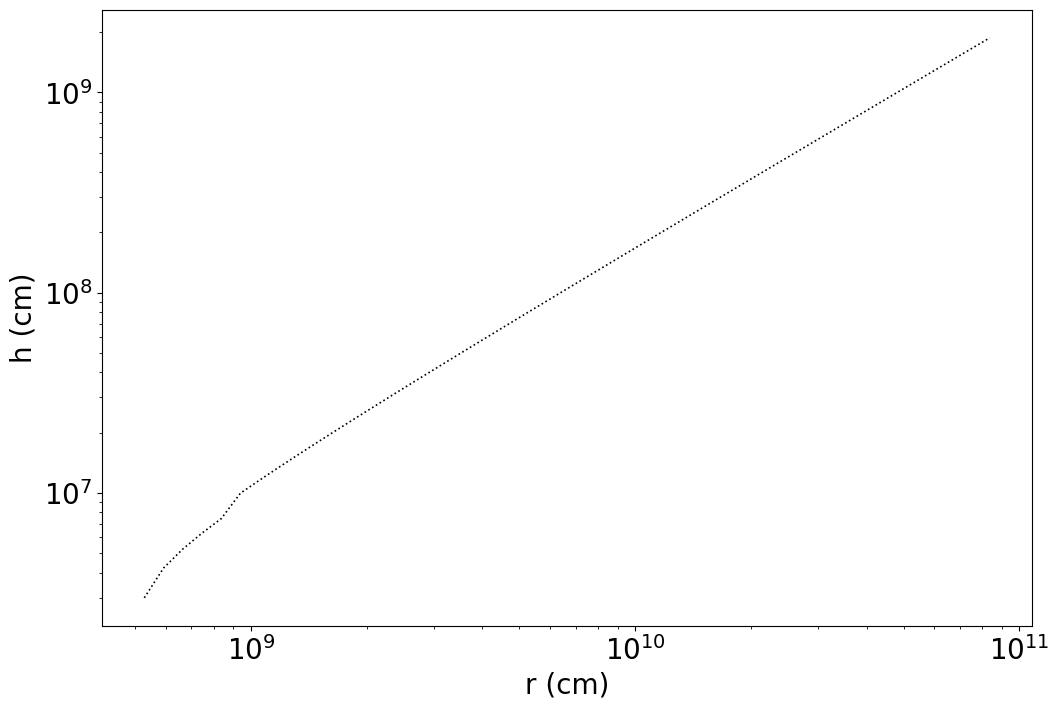

In [16]:
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(12, 8))
#plt.title("Plot of H w.r.t r")
plt.xlabel("r (cm)")
plt.ylabel("h (cm)")
plt.yscale("log")
plt.xscale("log")

min_R = r_g(M)*3
max_R = min_R*1e5
panels = 100

Variable_plot(min_R,max_R,M,M_dot,panels,1)

C:\Users\jezre\AppData\Local\Temp\ipykernel_21716\3335393788.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return (4.3e4)*(alpha**(-4/5))*(m(M)**(1/5))*(m_dot(M_dot)**(3/5))*(r_hat(r,M)**(-3/5))*(f(r, M)**(3/5))


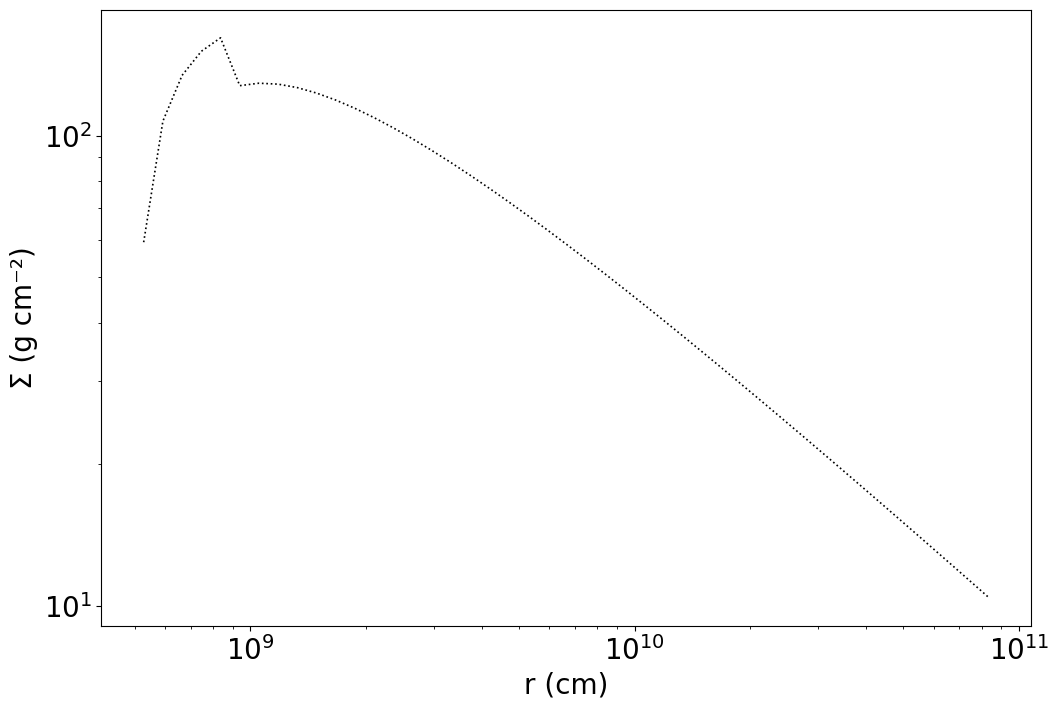

In [17]:
plt.figure(figsize=(12, 8))
#plt.title("Plot of Surface Density w.r.t r")
plt.xlabel("r (cm)")
plt.ylabel("Σ (g cm⁻²)")
plt.yscale("log")
plt.xscale("log")


min_R = r_g(M)*3
max_R = min_R*1e5
panels = 100

Variable_plot(min_R,max_R,M,M_dot,panels,2)

C:\Users\jezre\AppData\Local\Temp\ipykernel_21716\3335393788.py:32: RuntimeWarning: invalid value encountered in double_scalars
  return (8)*(alpha**(-7/10))*(m(M)**(-7/10))*(m_dot(M_dot)**(2/5))*(r_hat(r,M)**(-33/20))*(f(r, M)**(2/5))


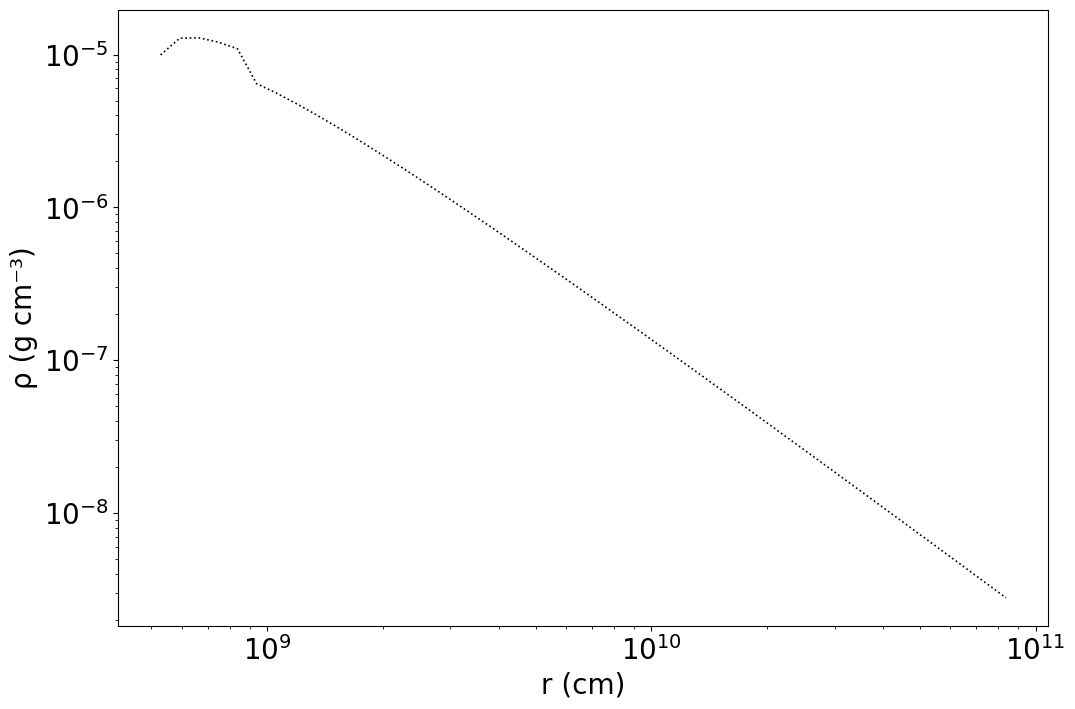

In [18]:
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(12, 8))
#plt.title("Plot of Density w.r.t r")
plt.xlabel("r (cm)")
plt.ylabel("ρ (g cm⁻³)")
plt.yscale("log")
plt.xscale("log")

min_R = r_g(M)*3
max_R = min_R*1e5
panels = 100

Variable_plot(min_R,max_R,M,M_dot,panels,3)

C:\Users\jezre\AppData\Local\Temp\ipykernel_21716\3335393788.py:35: RuntimeWarning: invalid value encountered in double_scalars
  return (1.7e6)*(alpha**(4/5))*(m(M)**(-1/5))*(m_dot(M_dot)**(2/5))*(r_hat(r,M)**(-2/5))*(f(r, M)**(-3/5))


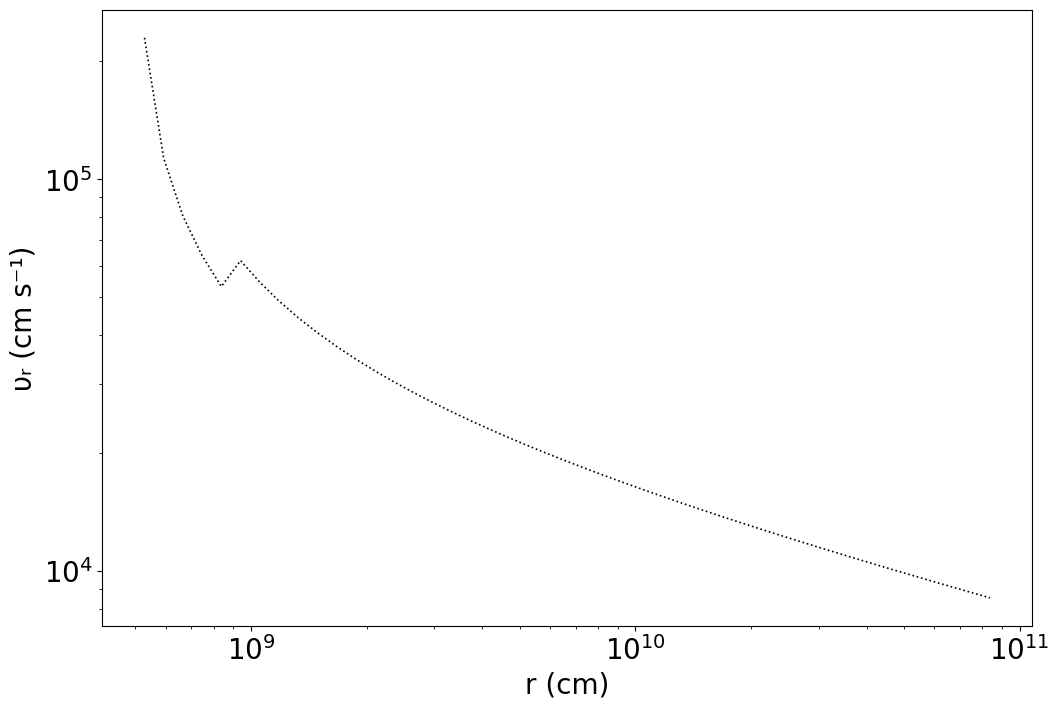

In [19]:
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(12, 8))
#plt.title("Plot of Radial Drift Velocity w.r.t r")
plt.xlabel("r (cm)")
plt.ylabel("υᵣ (cm s⁻¹)")
plt.yscale("log")
plt.xscale("log")

min_R = r_g(M)*3
max_R = min_R*1e5
panels = 100

Variable_plot(min_R,max_R,M,M_dot,panels,4)

C:\Users\jezre\AppData\Local\Temp\ipykernel_21716\3335393788.py:38: RuntimeWarning: invalid value encountered in double_scalars
  return (2.2e8)*(alpha**(-1/5))*(m(M)**(-1/5))*(m_dot(M_dot)**(2/5))*(r_hat(r,M)**(-9/10))*(f(r, M)**(2/5))


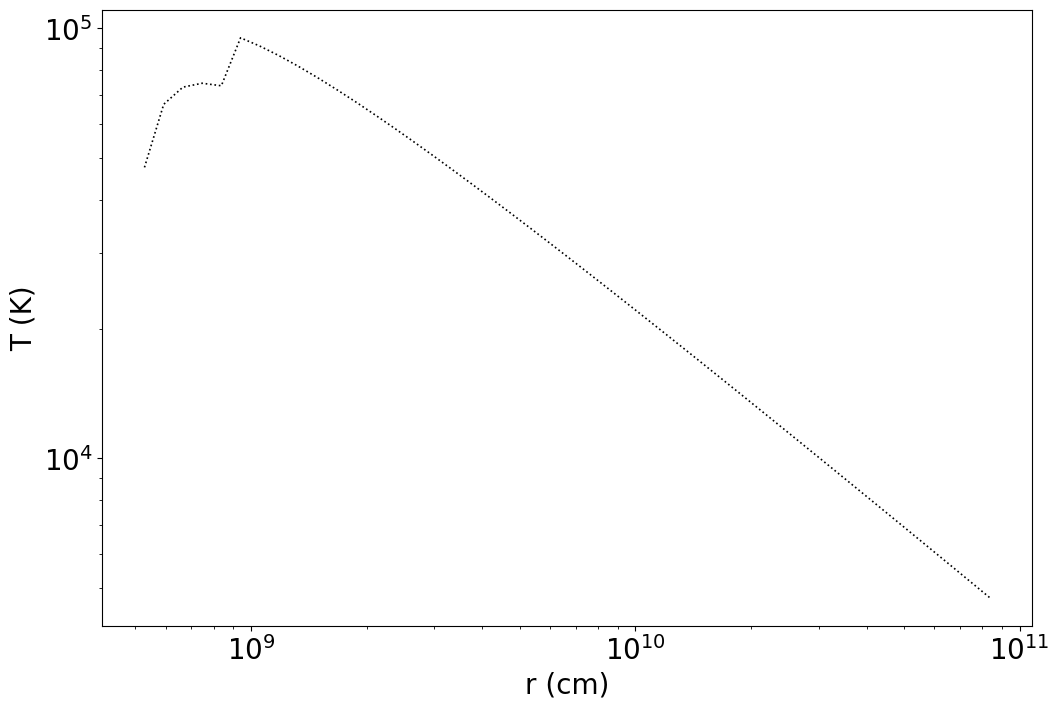

In [20]:
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(12, 8))
#plt.title("Plot of Central Temperature w.r.t r")
plt.xlabel("r (cm)")
plt.ylabel("T (K)")
plt.yscale("log")
plt.xscale("log")

min_R = r_g(M)*3
max_R = min_R*1e5
panels = 100

Variable_plot(min_R,max_R,M,M_dot,panels,5)

C:\Users\jezre\AppData\Local\Temp\ipykernel_21716\3335393788.py:41: RuntimeWarning: invalid value encountered in double_scalars
  return (2.4e1)*(alpha**(-4/5))*(m(M)**(1/5))*(m_dot(M_dot)**(1/10))*(r_hat(r,M)**(3/20))*(f(r, M)**(1/10))


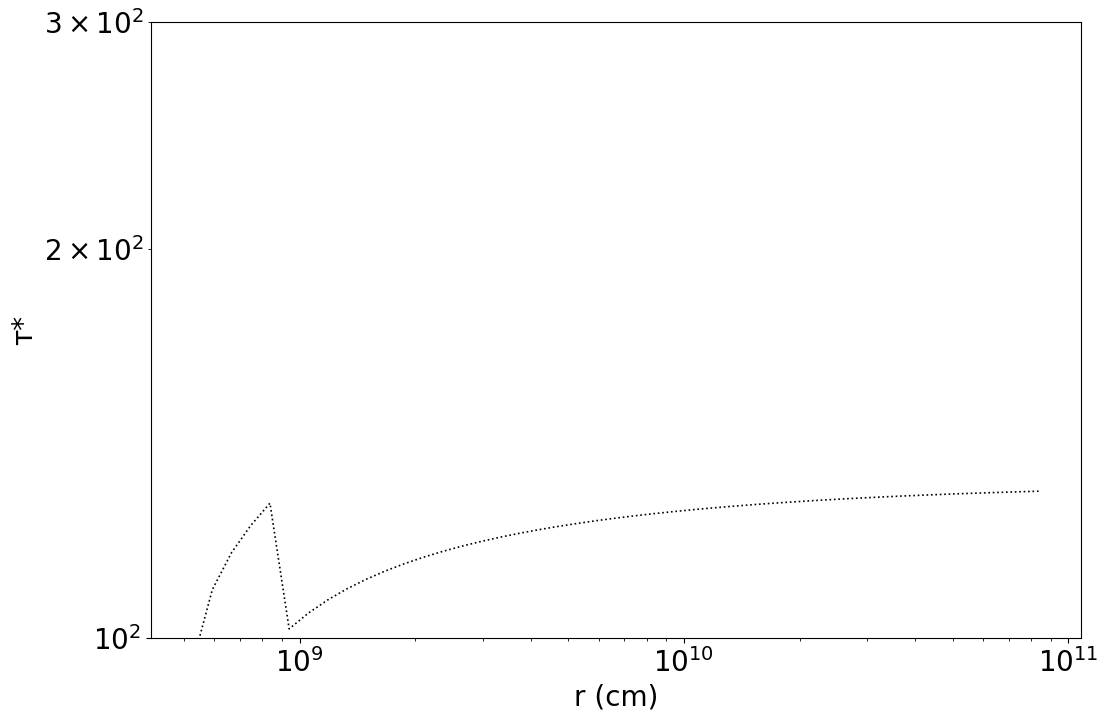

In [21]:
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(12, 8))
#plt.title("Plot of Effective Optical Depth w.r.t r")
plt.xlabel("r (cm)")
plt.ylabel("т*")
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e2, 3e2)

min_R = r_g(M)*3
max_R = min_R*1e5
panels = 100

Variable_plot(min_R,max_R,M,M_dot,panels,6)

In [22]:
#Opacity Approx


In [28]:
#kappa plotting function

def Kappa_1_plot(rmin, rmax, rho, NPanels):
    
    rlogarray = np.linspace(np.log10(rmin),np.log10(rmax),NPanels+1)
    rarray = 10**rlogarray
    
    rlogmidpoints = rlogarray + (rlogarray[1]-rlogarray[0])/2
    rlogmidpoints = np.delete(rlogmidpoints,len(rlogmidpoints)-1)  
    rmidpoints = 10**rlogmidpoints
    
    deltar = [x - rarray[i-1] for i, x in enumerate(rarray)][1:] 
    deltar = np.array(deltar)
 
    Karray = np.empty(len(rmidpoints))
    
    for i in range(len(Karray)):
        tag = rho
        Karray[i] = kappa(rho, rmidpoints[i]) 

    mindex = np.where(Karray == np.amax(Karray))
    maxt = str(Karray[mindex]).lstrip('[').rstrip(']')
    maxtrad = str(rmidpoints[mindex]).lstrip('[').rstrip(']')
    
    plot = plt.plot(rmidpoints, Karray, label = tag, linestyle ='dashed')
    legend = plt.legend(loc='upper left', borderpad = 0.8, title = "ρ",frameon=False)
    
    return plot

def Kappa_3_plot(rmin, rmax, rho, NPanels):
    
    rlogarray = np.linspace(np.log10(rmin),np.log10(rmax),NPanels+1)
    rarray = 10**rlogarray
    
    rlogmidpoints = rlogarray + (rlogarray[1]-rlogarray[0])/2
    rlogmidpoints = np.delete(rlogmidpoints,len(rlogmidpoints)-1)  
    rmidpoints = 10**rlogmidpoints
    
    deltar = [x - rarray[i-1] for i, x in enumerate(rarray)][1:] 
    deltar = np.array(deltar)
 
    Karray = np.empty(len(rmidpoints))
    
    for i in range(len(Karray)):
        tag = rho
        Karray[i] = kappa_bf(rho, rmidpoints[i]) 

    mindex = np.where(Karray == np.amax(Karray))
    maxt = str(Karray[mindex]).lstrip('[').rstrip(']')
    maxtrad = str(rmidpoints[mindex]).lstrip('[').rstrip(']')
    
    plot = plt.plot(rmidpoints, Karray, label = tag, linestyle ='dotted')
    legend = plt.legend(loc='upper left', borderpad = 0.8, title = "ρ",frameon=False)
    
    return plot

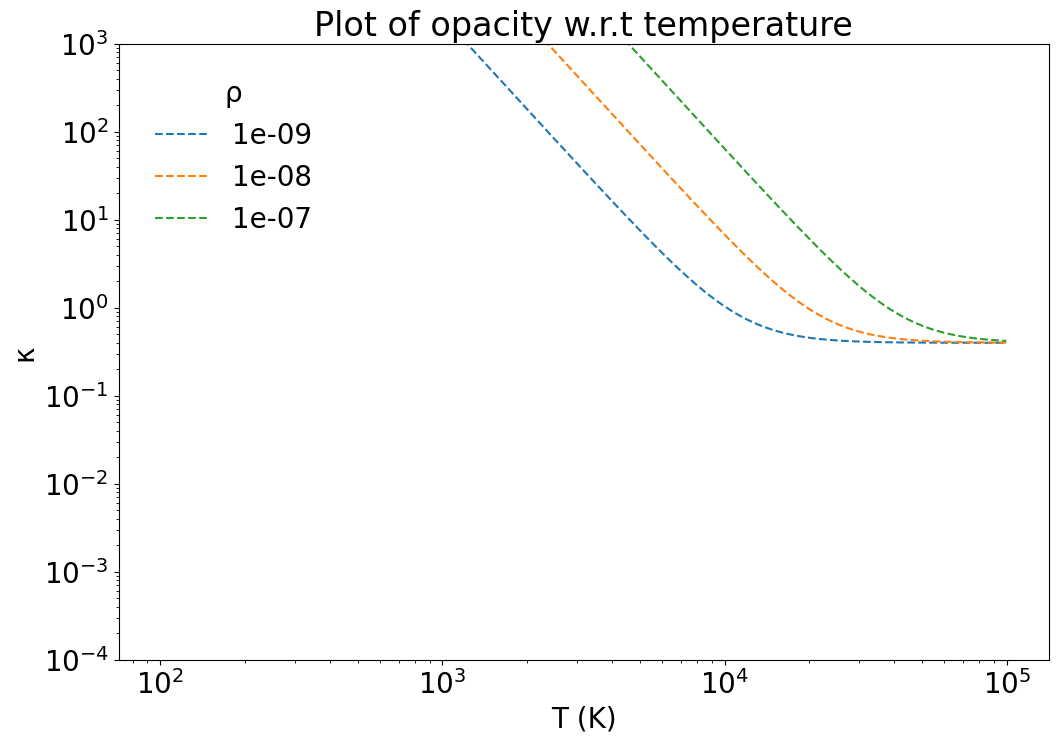

In [24]:
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(12, 8))
plt.title("Plot of opacity w.r.t temperature")
plt.xlabel("T (K)")
plt.ylabel("κ")
plt.yscale("log")
plt.xscale("log")

plt.ylim(10**-4, 10**3)

min_T = 100
max_T = 100000
panels = 1000

Kappa_1_plot(min_T,max_T,1e-9,panels)
Kappa_1_plot(min_T,max_T,1e-8,panels)
Kappa_1_plot(min_T,max_T,1e-7,panels)

In [25]:
#kappa plotting function 2
%run opacity_formulae.ipynb

def Kappa_2_plot(rmin, rmax, rho, NPanels):
    
    rlogarray = np.linspace(np.log10(rmin),np.log10(rmax),NPanels+1)
    rarray = 10**rlogarray
    
    rlogmidpoints = rlogarray + (rlogarray[1]-rlogarray[0])/2
    rlogmidpoints = np.delete(rlogmidpoints,len(rlogmidpoints)-1)  
    rmidpoints = 10**rlogmidpoints
    
    deltar = [x - rarray[i-1] for i, x in enumerate(rarray)][1:] 
    deltar = np.array(deltar)
 
    Karray = np.empty(len(rmidpoints))
    
    for i in range(len(Karray)):
        tag = rho
        Karray[i] = kappa_tot(rho, rmidpoints[i]) 

    mindex = np.where(Karray == np.amax(Karray))
    maxt = str(Karray[mindex]).lstrip('[').rstrip(']')
    maxtrad = str(rmidpoints[mindex]).lstrip('[').rstrip(']')
    
    plot = plt.plot(rmidpoints, Karray, label = tag, linestyle ='solid')
    legend = plt.legend(loc='upper left', borderpad = 0.8, title = "ρ (g cm⁻³)",frameon=False)
    
    return plot

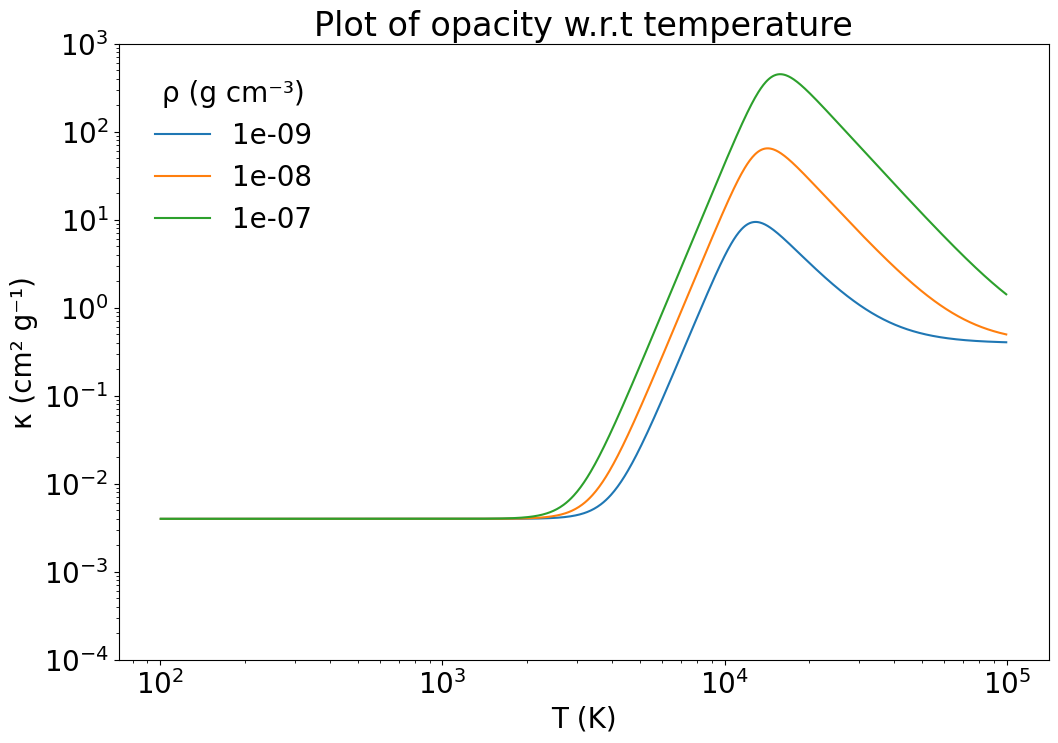

In [26]:
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(12, 8))
plt.title("Plot of opacity w.r.t temperature")
plt.xlabel("T (K)")
plt.ylabel("κ (cm² g⁻¹)")
plt.yscale("log")
plt.xscale("log")

plt.ylim(1e-4, 1e3)

min_T = 100
max_T = 100000
panels = 1000

Kappa_2_plot(min_T,max_T,1e-9,panels)
Kappa_2_plot(min_T,max_T,1e-8,panels)
Kappa_2_plot(min_T,max_T,1e-7,panels)

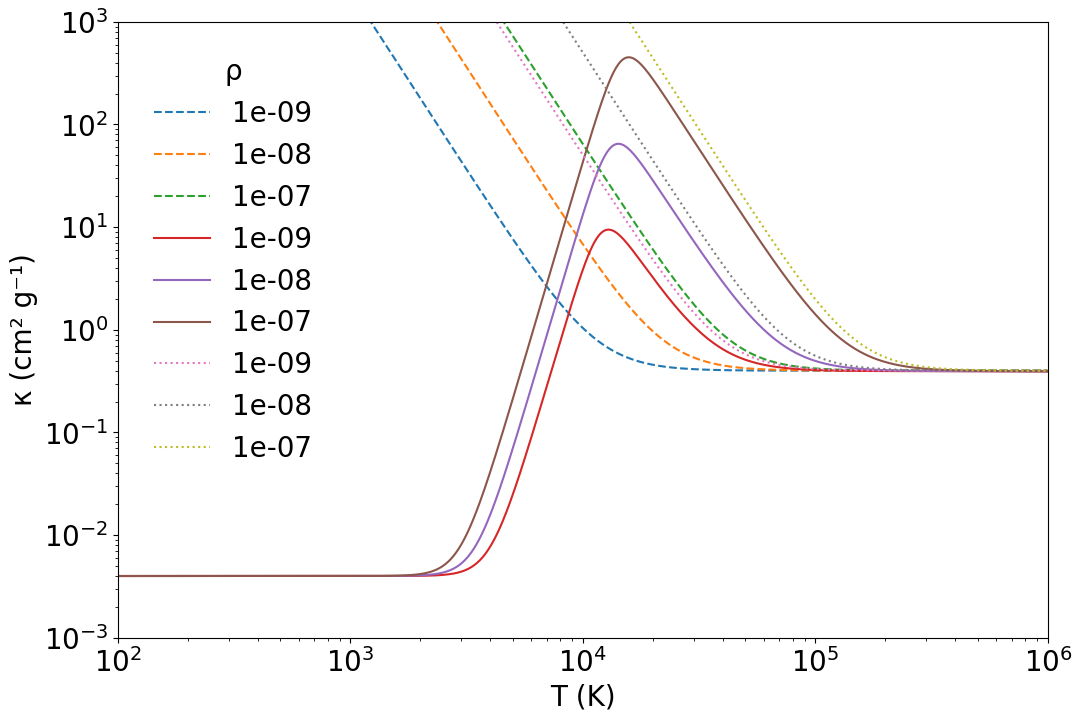

In [35]:
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.figure(figsize=(12, 8))
#plt.title("Plot of opacity w.r.t temperature")
plt.xlabel("T (K)")
plt.ylabel("κ (cm² g⁻¹)")
plt.yscale("log")
plt.xscale("log")

plt.xlim(1e2, 1e6)
plt.ylim(1e-3, 1e3)

min_T = 100
max_T = 1000000
panels = 1000

Kappa_1_plot(min_T,max_T,1e-9,panels)
Kappa_1_plot(min_T,max_T,1e-8,panels)
Kappa_1_plot(min_T,max_T,1e-7,panels)
Kappa_2_plot(min_T,max_T,1e-9,panels)
Kappa_2_plot(min_T,max_T,1e-8,panels)
Kappa_2_plot(min_T,max_T,1e-7,panels)
Kappa_3_plot(min_T,max_T,1e-9,panels)
Kappa_3_plot(min_T,max_T,1e-8,panels)
Kappa_3_plot(min_T,max_T,1e-7,panels)